In [2]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

#2020 population of Catalonia from https://www.idescat.cat/pub/?id=aec&n=245
popCatalunya = 7722203

#Catalonia's health department data https://dadescovid.cat/descarregues
resp = urlopen("https://dadescovid.cat/static/csv/catalunya_diari_total_pob.zip")
zipfile = ZipFile(BytesIO(resp.read()))
file = zipfile.namelist()[0]
df = pd.read_csv(zipfile.open(file), sep=";")
df.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,...,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
0,CATALUNYA,GLOBAL,2021-01-20,Altres,NaN,65,59,22,0,3,...,29,0,16,49,13,2,55,22,4,0
1,CATALUNYA,GLOBAL,2021-01-20,Dona,Entre 15 i 64,709,2136,5627,0,4,...,66,0,43,666,42,530,1941,5193,1551,539
2,CATALUNYA,GLOBAL,2021-01-20,Dona,Entre 65 i 74,83,163,400,0,2,...,43,1,5,78,5,54,139,386,16,49
3,CATALUNYA,GLOBAL,2021-01-20,Dona,Majors de 74,110,470,610,3,5,...,24,1,21,89,19,75,395,557,218,679
4,CATALUNYA,GLOBAL,2021-01-20,Dona,Menors de 15,123,108,758,0,0,...,0,0,5,118,5,84,103,742,0,0


In [3]:
df["DATA"] = pd.to_datetime(df["DATA"])
dfagg = df.groupby("DATA").agg(sum)
dfagg.tail()

,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
DATA,,,,,,,,,,,,,,,,
2021-01-16,1876,18398,5694,224,51,2668,498,59,895,981,996,955,16964,5268,4111,0
2021-01-17,1336,9443,3822,183,37,2817,517,66,548,788,636,743,8572,3621,2521,147
2021-01-18,4541,40493,20081,277,51,2803,530,60,1890,2651,1949,2654,36905,18674,10489,256
2021-01-19,3205,29871,18964,278,52,2869,543,26,1028,2177,1237,2309,26619,17852,4083,475
2021-01-20,2003,4436,12291,13,35,2844,563,4,162,1841,154,1439,4000,11569,2428,1618


In [4]:
dfaggvac = dfagg[dfagg["VACUNATS_DOSI_1"]>0]
dfaggvac.reset_index(inplace=True)
dfaggvac['Weekend'] = np.where(dfaggvac["DATA"].dt.weekday < 5,0,1)
dfaggvac["1st dose percent"] = dfaggvac["VACUNATS_DOSI_1"].cumsum()/popCatalunya*100
dfaggvac["2nd dose percent"] = dfaggvac["VACUNATS_DOSI_2"].cumsum()/popCatalunya*100

dfaggvac.head()

,DATA,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2,Weekend,1st dose percent,2nd dose percent
0,2020-12-27,1128,4998,4121,163,32,1757,321,42,403,725,331,573,4620,3896,803,0,1,0.010399,0.0
1,2020-12-28,4023,21832,19981,236,37,1803,335,47,1408,2615,1236,2377,19520,18550,1,0,0,0.010412,0.0
2,2020-12-29,3981,26477,19708,240,27,1820,335,44,1548,2433,1493,2299,23772,18179,444,0,0,0.016161,0.0
3,2020-12-30,3765,27664,19683,222,23,1805,328,47,1488,2277,1531,2232,24666,18454,2578,0,0,0.049545,0.0
4,2020-12-31,3399,22458,17184,214,42,1772,340,47,1441,1958,1627,2007,20121,16146,2535,0,0,0.082373,0.0


<IPython.core.display.Javascript object>


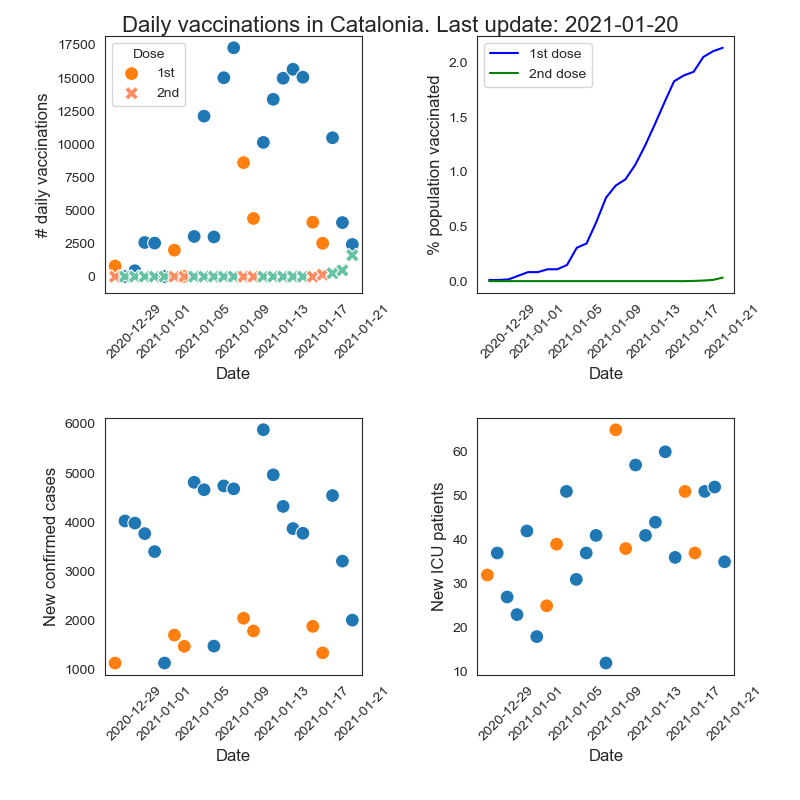

In [15]:
dmax = max(dfaggvac["DATA"]) + pd.DateOffset(1)
dmin = min(dfaggvac["DATA"]) - pd.DateOffset(1)
sns.set_style('white')


fig, axes = plt.subplots(2,2,figsize=(8,8))
fig.suptitle("Daily vaccinations in Catalonia. Last update: " + max(dfaggvac["DATA"]).strftime("%Y-%m-%d"), fontsize=16)

#sns.set(rc={'figure.figsize':(9,9)})

sns.scatterplot(ax= axes[0][0], data=dfaggvac, x="DATA", y="VACUNATS_DOSI_1", 
                hue="Weekend", s=100, label="1st dose", legend=False)
sns.scatterplot(ax= axes[0][0], data=dfaggvac, x="DATA", y="VACUNATS_DOSI_2", 
                hue="Weekend", palette="Set2", s=100, label="2nd dose", legend=False, marker="X")

axes[0][0].set_xlabel('Date', fontsize=12)
axes[0][0].set_ylabel('# daily vaccinations', fontsize=12)
axes[0][0].tick_params(axis='y')
axes[0][0].tick_params(axis="x",rotation=45)
axes[0][0].set_xlim(dmin, dmax)
#axes[0][0].legend([],[], frameon=False)
axes[0][0].legend(title='Dose', loc='upper left', labels=['1st', '2nd'])


sns.lineplot(ax= axes[0][1], x=dfaggvac["DATA"], y=dfaggvac["1st dose percent"], color="b", label="1st dose")
sns.lineplot(ax= axes[0][1], x=dfaggvac["DATA"], y=dfaggvac["2nd dose percent"], color="g", label="2nd dose")
axes[0][1].set_xlabel('Date', fontsize=12)
axes[0][1].set_ylabel('% population vaccinated', fontsize=12)
axes[0][1].tick_params(axis='y')
axes[0][1].tick_params(axis="x",rotation=45)

sns.scatterplot(ax= axes[1][0], data=dfaggvac, x="DATA", y="CASOS_CONFIRMAT", hue="Weekend", s=100)

axes[1][0].set_xlabel('Date', fontsize=12)
axes[1][0].set_ylabel('New confirmed cases', fontsize=12)
axes[1][0].tick_params(axis='y')
axes[1][0].tick_params(axis="x",rotation=45)
axes[1][0].set_xlim(dmin, dmax)
axes[1][0].legend([],[], frameon=False)

sns.scatterplot(ax= axes[1][1], data=dfaggvac, x="DATA", y="INGRESSOS_CRITIC", hue="Weekend", s=100)

axes[1][1].set_xlabel('Date', fontsize=12)
axes[1][1].set_ylabel('New ICU patients', fontsize=12)
axes[1][1].tick_params(axis='y')
axes[1][1].tick_params(axis="x",rotation=45)
axes[1][1].set_xlim(dmin, dmax)
axes[1][1].legend([],[], frameon=False)

fig.tight_layout(pad=2.6)